# 10/05 - Pair Programming Limpieza III - Lidia y Tatiana

**HIPOTESIS**

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

# EJERCICIO 1

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
¿Sobre que columnas podremos eliminar o reemplazar los outliers?
Identifica visualmente los outliers
Identifica sobre el dataframe las filas que son outliers
Reemplaza los outliers por el estadístico más correcto.
Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.

In [5]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("./limpio2.csv", index_col=0)
df.head()

,year,type,country,sex_,age,species_,fatal_(y/n),date
0,2018,Boating,usa,F,57,white_shark,N,25-Jun-2018
1,2018,Unprovoked,usa,F,11,unspecified,N,18-Jun-2018
2,2018,Invalid,usa,M,48,unspecified,N,09-Jun-2018
3,2018,Unprovoked,australia,M,27,unspecified,N,08-Jun-2018
4,2018,Provoked,mexico,M,27,tiger_shark,N,04-Jun-2018


- **¿Sobre que columnas podremos eliminar o reemplazar los outliers?**

    Comentario sobre que columnas vamos a estudiar

In [6]:
#Definimos la variables numéricas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,year,age
0,2018,57
1,2018,11


In [7]:
df_numericas.dtypes

year    int64
age     int64
dtype: object

In [8]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'age']

In [9]:
def detectar_outliers(lista_columnas,df):
    dic_indices={}

    for col in lista_columnas:
        Q1=np.nanpercentile(df[col],25)
        Q3=np.nanpercentile(df[col],75)
        IQR=Q3-Q1

        outlier_inferior=Q1 - 1.5 * IQR
        outlier_superior= Q3 + 1.5 * IQR        

        outlier_datos= df[(df[col] < outlier_inferior) | (df[col] > outlier_superior)]

        if outlier_datos.shape[0]>0:
            dic_indices[col]=(list(outlier_datos.index))
    return dic_indices



In [ ]:
# Todos los outliers de "year" y de "age"
indices_outliers = detectar_outliers(lista_columnas, df)
print(indices_outliers)

In [11]:
#aqui queriamos hacer una lista con los valores de cada indice, ¿Que valor contiene cada indice?

In [12]:
indices = indices_outliers.values()

In [13]:
# Para ver los datos de "year"
df.loc[[6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 
6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 
6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056,
 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 
 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6082, 6083, 6084, 6085, 6086, 
 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102,
  6103, 6104, 6105, 6106, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120,
   6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 
   6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 
   6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177,
    6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197,
     6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 
     6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 
     6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6255, 6256, 6257, 6258, 6259, 
     6260, 6261, 6262, 6263, 6264, 6265, 6267, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6277, 6278, 6279, 6281, 6282, 6283],["year"]]

,year
6022,1847
6023,1847
6024,1847
6025,1847
6026,1847
...,...
6278,0
6279,0
6281,0
6282,0


In [14]:
# Para ver los datos de "year"
df.loc[[37, 100, 130, 141, 159, 196, 197, 204, 234, 265, 287, 305, 321, 396, 
428, 429, 431, 435, 530, 567, 569, 600, 611, 646, 653, 693, 836, 851, 918, 956, 960,
 1028, 1263, 1377, 1378, 1542, 1590, 1616, 1666, 1791, 1906, 1934, 1983, 1991, 2012, 2028, 
 2290, 2380, 2435, 2469, 2501, 2591, 2838, 2840, 2867, 2983, 3143, 3357, 3428, 3464, 4213, 4416, 
 4555, 4659, 5102, 5121, 5372],["age"]]

,age
37,69
100,69
130,82
141,73
159,68
...,...
4555,78
4659,68
5102,78
5121,70


- **Identifica visualmente los outliers**

    Boxplot y comentar

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

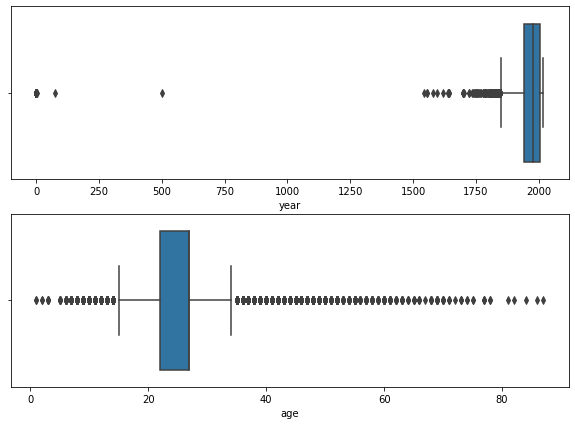

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,7))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

- **Identifica sobre el dataframe las filas que son outliers**

    "year"

In [17]:
df.loc[[6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 
6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 
6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056,
 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 
 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6082, 6083, 6084, 6085, 6086, 
 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102,
  6103, 6104, 6105, 6106, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120,
   6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 
   6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 
   6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177,
    6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197,
     6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 
     6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236, 6237, 
     6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6247, 6248, 6249, 6250, 6251, 6252, 6253, 6255, 6256, 6257, 6258, 6259, 
     6260, 6261, 6262, 6263, 6264, 6265, 6267, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6277, 6278, 6279, 6281, 6282, 6283],["year"]]

,year
6022,1847
6023,1847
6024,1847
6025,1847
6026,1847
...,...
6278,0
6279,0
6281,0
6282,0


    "age"

In [18]:
df.loc[[37, 100, 130, 141, 159, 196, 197, 204, 234, 265, 287, 305, 321, 396, 
428, 429, 431, 435, 530, 567, 569, 600, 611, 646, 653, 693, 836, 851, 918, 956, 960,
 1028, 1263, 1377, 1378, 1542, 1590, 1616, 1666, 1791, 1906, 1934, 1983, 1991, 2012, 2028, 
 2290, 2380, 2435, 2469, 2501, 2591, 2838, 2840, 2867, 2983, 3143, 3357, 3428, 3464, 4213, 4416, 
 4555, 4659, 5102, 5121, 5372],["age"]]

,age
37,69
100,69
130,82
141,73
159,68
...,...
4555,78
4659,68
5102,78
5121,70


- **Reemplaza los outliers por el estadístico más correcto.**

In [19]:
df.describe()

,year,age
count,6237.000000,6237.000000
mean,1928.874940,27.181017
std,276.087103,10.314122
min,0.000000,1.000000
25%,1942.000000,22.000000
50%,1977.000000,27.000000
75%,2005.000000,27.000000
max,2018.000000,87.000000


In [20]:
df["year"].median()

1977.0

In [21]:
df["age"].median()

27.0

    Hemos identificado que la media y la mediana de ambas columnas son similares, pero optamos por utilizar la mediana 

In [22]:
ind = detectar_outliers(lista_columnas, df)

In [23]:
for k, v in ind.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.

In [24]:
df["year"][6022]

1977

In [25]:
df["age"][37]

27

In [26]:
df.head()

,year,type,country,sex_,age,species_,fatal_(y/n),date
0,2018,Boating,usa,F,27,white_shark,N,25-Jun-2018
1,2018,Unprovoked,usa,F,27,unspecified,N,18-Jun-2018
2,2018,Invalid,usa,M,27,unspecified,N,09-Jun-2018
3,2018,Unprovoked,australia,M,27,unspecified,N,08-Jun-2018
4,2018,Provoked,mexico,M,27,tiger_shark,N,04-Jun-2018


- **Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.**

In [28]:
df.to_csv("limpieza_3.csv")